<a href="https://colab.research.google.com/github/robbieadam/sentiment-analysis/blob/main/uts_text_minning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisa Sentimen Objek

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "https://raw.githubusercontent.com/robbieadam/sentiment-analysis/main/hasil-review-hotel.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,hotel_name,name,rating,review
0,C3 Hotel Ungaran,chrno cruz,4.0,"my first visit was around 8 to 9 years ago, an..."
1,C3 Hotel Ungaran,Egi Dio,5.0,"Decent cafe, but just accross the street from ..."
2,C3 Hotel Ungaran,Aprilla Ginting,4.0,Friendly and helpful staff. The room was comfo...
3,C3 Hotel Ungaran,Candra Ar,3.0,Need to improve cleanliness of bedroom and bat...
4,C3 Hotel Ungaran,Dinny Ø£Ù Abizar,5.0,Clean room. Cozy atmosphere. Strategic locatio...
...,...,...,...,...
495,Hotel Serrata,JesS iCa,2.0,(Translated by Google) The food is actually Ly...
496,Hotel Serrata,Agus SP SP,4.0,(Translated by Google) Hotel in the upper Sema...
497,Hotel Serrata,Felix Iwan,5.0,(Translated by Google) There is one old hotel ...
498,Hotel Serrata,Monox LG,1.0,(Translated by Google) Attending invitations a...


In [3]:
df.drop(columns = ['hotel_name', 'name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,4.0,"my first visit was around 8 to 9 years ago, an..."
1,5.0,"Decent cafe, but just accross the street from ..."
2,4.0,Friendly and helpful staff. The room was comfo...
3,3.0,Need to improve cleanliness of bedroom and bat...
4,5.0,Clean room. Cozy atmosphere. Strategic locatio...


Preprocessing Data

Cleaning The Text

In [4]:
import string
import re

In [5]:
def clean_Review(Review):
    return re.sub('[^a-zA-Z]', ' ', Review).lower()
  
df['cleaned_Review'] = df['Review'].apply(lambda x: clean_Review(str(x)))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features - length of, and percentage of punctuations in the text

In [6]:
def count_punct(Review):
    count = sum([1 for char in Review if char in string.punctuation])
    return round(count/(len(Review) - Review.count(" ")), 3)*100
  
df['Review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_Review,label,Review_len,punct
0,4.0,"my first visit was around 8 to 9 years ago, an...",my first visit was around to years ago an...,1,755,8.1
1,5.0,"Decent cafe, but just accross the street from ...",decent cafe but just accross the street from ...,1,75,4.0
2,4.0,Friendly and helpful staff. The room was comfo...,friendly and helpful staff the room was comfo...,1,89,4.5
3,3.0,Need to improve cleanliness of bedroom and bat...,need to improve cleanliness of bedroom and bat...,0,248,4.0
4,5.0,Clean room. Cozy atmosphere. Strategic locatio...,clean room cozy atmosphere strategic locatio...,1,64,6.2
...,...,...,...,...,...,...
495,2.0,(Translated by Google) The food is actually Ly...,translated by google the food is actually ly...,0,818,3.9
496,4.0,(Translated by Google) Hotel in the upper Sema...,translated by google hotel in the upper sema...,1,207,3.9
497,5.0,(Translated by Google) There is one old hotel ...,translated by google there is one old hotel ...,1,511,2.7
498,1.0,(Translated by Google) Attending invitations a...,translated by google attending invitations a...,0,361,8.3


Tokenization

In [7]:
def tokenize_Review(Review):
    tokenized_Review = Review.split()
    return tokenized_Review
  
df['tokens'] = df['cleaned_Review'].apply(lambda x: tokenize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens
0,4.0,"my first visit was around 8 to 9 years ago, an...",my first visit was around to years ago an...,1,755,8.1,"[my, first, visit, was, around, to, years, ago..."
1,5.0,"Decent cafe, but just accross the street from ...",decent cafe but just accross the street from ...,1,75,4.0,"[decent, cafe, but, just, accross, the, street..."
2,4.0,Friendly and helpful staff. The room was comfo...,friendly and helpful staff the room was comfo...,1,89,4.5,"[friendly, and, helpful, staff, the, room, was..."
3,3.0,Need to improve cleanliness of bedroom and bat...,need to improve cleanliness of bedroom and bat...,0,248,4.0,"[need, to, improve, cleanliness, of, bedroom, ..."
4,5.0,Clean room. Cozy atmosphere. Strategic locatio...,clean room cozy atmosphere strategic locatio...,1,64,6.2,"[clean, room, cozy, atmosphere, strategic, loc..."


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [9]:
def lemmatize_Review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_Review'] = df['tokens'].apply(lambda x: lemmatize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens,lemmatized_Review
0,4.0,"my first visit was around 8 to 9 years ago, an...",my first visit was around to years ago an...,1,755,8.1,"[my, first, visit, was, around, to, years, ago...",first visit around year ago nothing really cha...
1,5.0,"Decent cafe, but just accross the street from ...",decent cafe but just accross the street from ...,1,75,4.0,"[decent, cafe, but, just, accross, the, street...",decent cafe accross street sate sapi pak kempl...
2,4.0,Friendly and helpful staff. The room was comfo...,friendly and helpful staff the room was comfo...,1,89,4.5,"[friendly, and, helpful, staff, the, room, was...",friendly helpful staff room comfortable clean ...
3,3.0,Need to improve cleanliness of bedroom and bat...,need to improve cleanliness of bedroom and bat...,0,248,4.0,"[need, to, improve, cleanliness, of, bedroom, ...",need improve cleanliness bedroom bathroom espe...
4,5.0,Clean room. Cozy atmosphere. Strategic locatio...,clean room cozy atmosphere strategic locatio...,1,64,6.2,"[clean, room, cozy, atmosphere, strategic, loc...",clean room cozy atmosphere strategic location ...


##EDA (Exploratory Data Analysis)

In [10]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"Rating 1.0 = { len(df[df['Rating']==1.0]) } rows")
print(f"Rating 2.0 = { len(df[df['Rating']==2.0]) } rows")
print(f"Rating 3.0 = { len(df[df['Rating']==3.0]) } rows")
print(f"Rating 4.0 = { len(df[df['Rating']==4.0]) } rows")
print(f"Rating 5.0 = { len(df[df['Rating']==5.0]) } rows")

Input data has 500 rows and 8 columns
Rating 1.0 = 32 rows
Rating 2.0 = 11 rows
Rating 3.0 = 47 rows
Rating 4.0 = 140 rows
Rating 5.0 = 270 rows


Number of null in label: 0
Number of null in text: 0


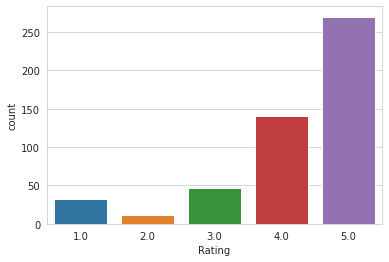

In [11]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);

Visualizing Word Clouds

In [12]:
from wordcloud import WordCloud

In [13]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0) ]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_Review'].tolist()
positive_list=df_positive['lemmatized_Review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()


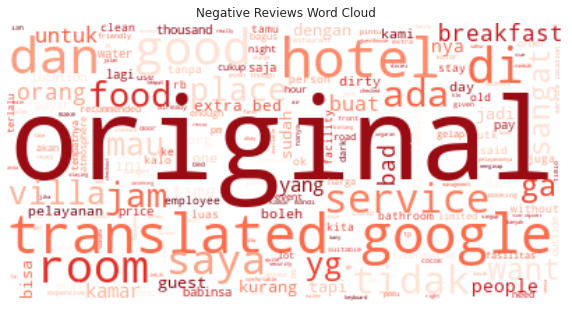

In [14]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

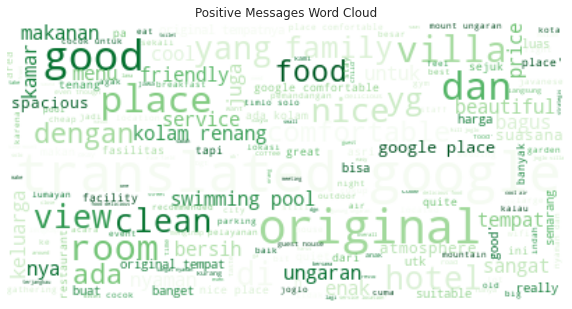

In [15]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [16]:
X = df[['lemmatized_Review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 3)
(150, 3)
(350,)
(150,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_Review'])
tfidf_test = tfidf.transform(X_test['lemmatized_Review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895
0,119,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.251253,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0

Training different Classification models

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

##KLASIFIKASI
Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.86      0.98      0.92       130

    accuracy                           0.85       150
   macro avg       0.43      0.49      0.46       150
weighted avg       0.75      0.85      0.80       150



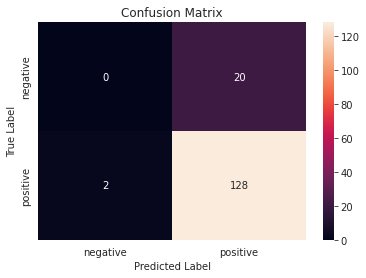

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.86      0.97      0.91       130

    accuracy                           0.84       150
   macro avg       0.43      0.48      0.46       150
weighted avg       0.75      0.84      0.79       150



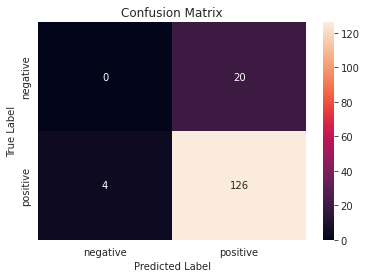

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.87      0.99      0.92       130

    accuracy                           0.86       150
   macro avg       0.43      0.50      0.46       150
weighted avg       0.75      0.86      0.80       150



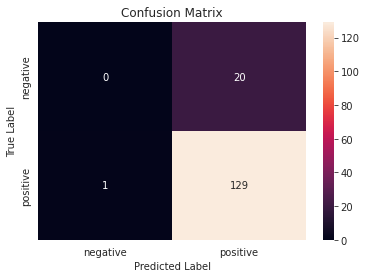

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.67      0.10      0.17        20
           1       0.88      0.99      0.93       130

    accuracy                           0.87       150
   macro avg       0.77      0.55      0.55       150
weighted avg       0.85      0.87      0.83       150



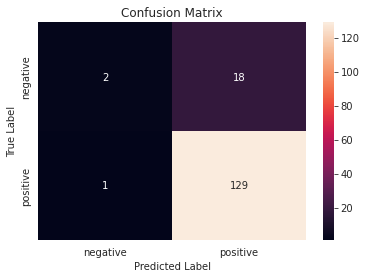

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.86      0.92      0.89       130

    accuracy                           0.80       150
   macro avg       0.43      0.46      0.44       150
weighted avg       0.74      0.80      0.77       150



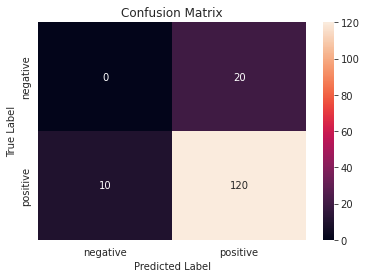

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.86      0.96      0.91       130

    accuracy                           0.83       150
   macro avg       0.43      0.48      0.45       150
weighted avg       0.75      0.83      0.79       150



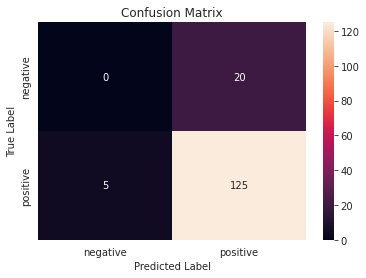

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K=10

In [27]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.7971428571428572 
 precision - 0.8011764705882353 
 recall - 0.9928571428571429 
 f1 - 0.8867383512544803 

Logistic Regression
 accuracy - 0.82 
 precision - 0.8185739750445633 
 recall - 0.9964285714285716 
 f1 - 0.8986544450320231 

Random Forest
 accuracy - 0.8028571428571428 
 precision - 0.813852495543672 
 recall - 0.9892857142857142 
 f1 - 0.8932669369528174 

SVM
 accuracy - 0.8171428571428571 
 precision - 0.8198573975044562 
 recall - 0.9892857142857142 
 f1 - 0.8964921558258416 

KNN
 accuracy - 0.7942857142857143 
 precision - 0.8212787145650049 
 recall - 0.95 
 f1 - 0.8806690129974376 

Extra Trees
 accuracy - 0.8114285714285714 
 precision - 0.8307064358001265 
 recall - 0.9607142857142856 
 f1 - 0.8904750389163498 



prediction

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_Review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [34]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.86

In [40]:
data = ["buruk", "bagus", "Saya benci layanannya, ini sangat buruk", "perawat ini sangat baik"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[0 1 0 1]
